Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2023/2024  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 4. travnja 2024. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje. 

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** 

**Na ovoj vježbi možete ostvariti ukupno 10 bodova. Vaša Jupyter bilježnica ocjenjivat će se s mogućnošću ostvarivanja do 6 bodova. Bodovi iz bilježnice bit će uneseni u sustav prije Vašeg termina usmene obrane, na kojoj možete ostvariti preostala 4 boda. Napominjemo da će se prilikom ocjenjivanja strogo provjeravati originalnost vaših rješenja. Predstavljanje tuđeg rada kao vlastitog je kršenje kodeksa ponašanja studenata i takvi slučajevi bit će prijavljeni povjerenstvu za stegovnu odgovornost.**

Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. Za ovu laboratorijsku vježbu, predaja Jupyter bilježnice i usmena obrana rješenja nisu obavezne. Možete predati bilježnicu bez dolaska na usmenu obranu, ali predaja bilježnice je nužan uvjet za usmenu obranu. Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1234)


### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [2]:
x = np.array([
    [10, 3, 2],
    [7, 2, 6],
    [8, 1, 3],
    [7, 1, 4]
])

mean_vector = np.mean(x, axis=0)
covariance_matrix = np.cov(x, rowvar=False, bias=True)
correlation_matrix = np.corrcoef(x, rowvar=False)

print(f"Vektor srednjih vrijednosti je: {mean_vector}")
print(f"\nMatrica kovarijance S je:\n{covariance_matrix}")
print(f"\nMatrica korelacije R je:\n{correlation_matrix}")


Vektor srednjih vrijednosti je: [8.   1.75 3.75]

Matrica kovarijance S je:
[[ 1.5     0.75   -1.5   ]
 [ 0.75    0.6875 -0.3125]
 [-1.5    -0.3125  2.1875]]

Matrica korelacije R je:
[[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

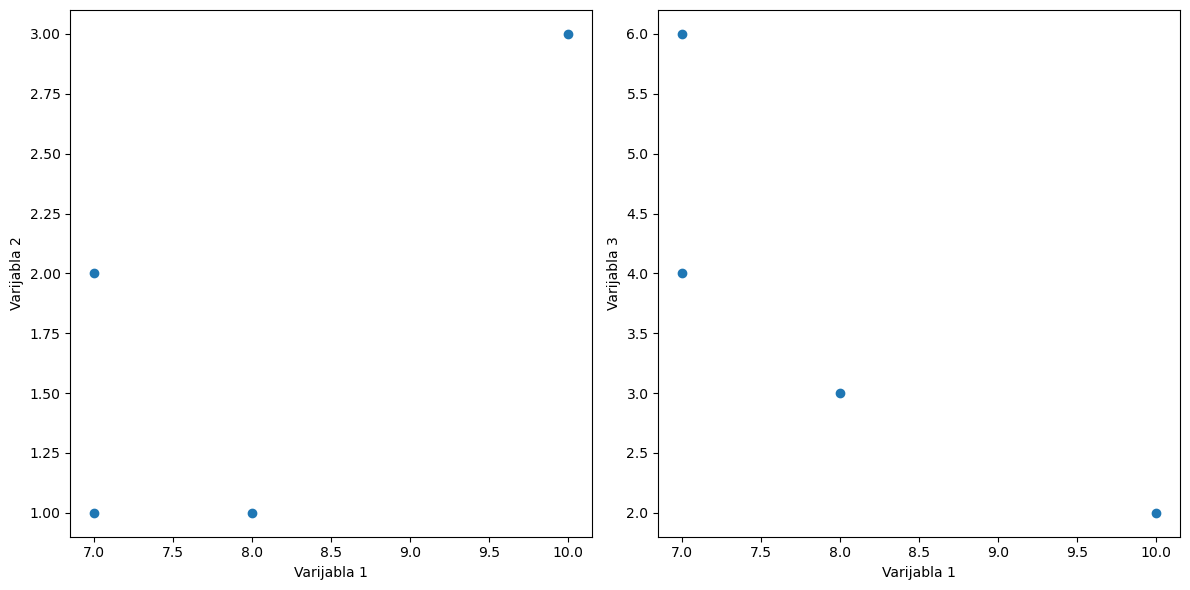

In [3]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x[:, 0], x[:, 1])
plt.xlabel('Varijabla 1')
plt.ylabel('Varijabla 2')

plt.subplot(1, 2, 2)
plt.scatter(x[:, 0], x[:, 2])
plt.xlabel('Varijabla 1')
plt.ylabel('Varijabla 3')

plt.tight_layout()
plt.show()

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [4]:
def stat_dist(x1, x2, S):
    return np.dot(np.dot(np.transpose((x1-x2)), np.linalg.inv(S)), (x1-x2))
def eucc_dist(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))


print(f"Statisticka udaljenost je: {round(stat_dist(x[0], x[3], covariance_matrix),4)}")
print(f"Euklidska udaljenost je: {round(eucc_dist(x[0], x[3]),4)}")

Statisticka udaljenost je: 8.0
Euklidska udaljenost je: 4.1231


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [5]:
deviations = x - mean_vector
for i in range(3):
    print(f"Vektor devijacija za varijablu {i+1}: {deviations[:, i]}")
    
std_deviations = np.std(x, axis=0)


Vektor devijacija za varijablu 1: [ 2. -1.  0. -1.]
Vektor devijacija za varijablu 2: [ 1.25  0.25 -0.75 -0.75]
Vektor devijacija za varijablu 3: [-1.75  2.25 -0.75  0.25]


#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

In [6]:
reconstructed_covariance_matrix = np.zeros((x.shape[1], x.shape[1]))
reconstructed_correlation_matrix = np.zeros((x.shape[1], x.shape[1]))

n = x.shape[0]
for i in range(n):
    reconstructed_covariance_matrix += np.outer(deviations[i], deviations[i])
reconstructed_covariance_matrix /= n

for i in range(n):
    norm_deviation = np.linalg.norm(deviations[i])
    if norm_deviation != 0:
        normalized_deviation = deviations[i] / norm_deviation
        reconstructed_correlation_matrix += np.outer(normalized_deviation, normalized_deviation)
reconstructed_correlation_matrix /= n

print("Rekonstruirana matrica kovarijance:")
print(reconstructed_covariance_matrix)
print("\nOriginalna matrica kovarijance:")
print(covariance_matrix)
print("\nRekonstruirana matrica korelacije:")
print(reconstructed_correlation_matrix)
print("\nOriginalna matrica korelacije:")
print(correlation_matrix)


Rekonstruirana matrica kovarijance:
[[ 1.5     0.75   -1.5   ]
 [ 0.75    0.6875 -0.3125]
 [-1.5    -0.3125  2.1875]]

Originalna matrica kovarijance:
[[ 1.5     0.75   -1.5   ]
 [ 0.75    0.6875 -0.3125]
 [-1.5    -0.3125  2.1875]]

Rekonstruirana matrica korelacije:
[[ 0.31060451  0.1776443  -0.23174755]
 [ 0.1776443   0.25937934  0.05570723]
 [-0.23174755  0.05570723  0.43001615]]

Originalna matrica korelacije:
[[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]


#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [7]:
generalized_variance = np.linalg.det(covariance_matrix)

x1d = x[:, 0] + x[:, 1]
new_x = np.column_stack((x, x1d))

new_cov_mat = np.cov(new_x, rowvar=False, bias=True)

new_gen_mat = np.linalg.det(new_cov_mat)

print("Uzoračka generalizirana varijanca za originalni uzorak X:", generalized_variance)
print("Uzoračka generalizirana varijanca za novi uzorak X sa x3:", new_gen_mat)


Uzoračka generalizirana varijanca za originalni uzorak X: 0.03515624999999995
Uzoračka generalizirana varijanca za novi uzorak X sa x3: -1.1709383462843448e-17


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [8]:
x1e = x[:-1, :]

cov_mat_x1e = np.cov(x1e, rowvar=False, bias=True)

gen_x1e = np.linalg.det(cov_mat_x1e)

eigenvalues, eigenvectors = np.linalg.eig(cov_mat_x1e)

print("Uzoracka gen. matrica za x bez zadne opservacije:", gen_x1e)
print("Svojstveni vektori za modificiranu kovarijacijsku matricu:\n", eigenvectors)


Uzoracka gen. matrica za x bez zadne opservacije: 3.4540271877226984e-16
Svojstveni vektori za modificiranu kovarijacijsku matricu:
 [[-0.58069605 -0.73786479  0.34401694]
 [-0.17731308  0.52704628  0.83113314]
 [ 0.79457673 -0.42163702  0.43688677]]


### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [9]:
means = np.array([2, 3])
cov = np.array([[10**2, 6**2], [6**2, 6**2]])

sample = np.random.multivariate_normal(means, cov, size=1000)

print(sample[:5])


[[ -0.46241282  -3.92005038]
 [-11.5162154   -4.59601947]
 [  7.46640939   9.78584958]
 [ -5.29034475  -3.38131195]
 [  5.93722809  -6.18056367]]


#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

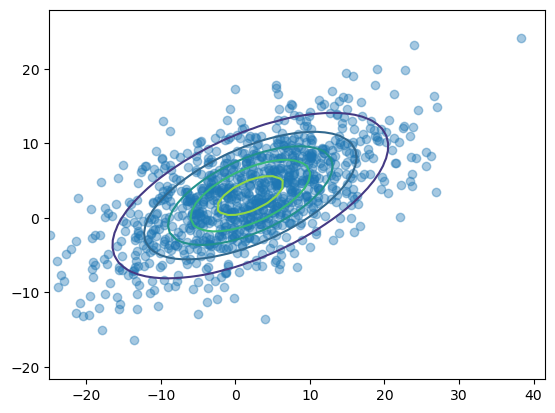

In [10]:
from scipy.stats import multivariate_normal


plt.scatter(sample[:, 0], sample[:, 1], alpha = 0.4)
plt.axis('equal')
x, y = np.mgrid[-25:35,-20:25]
pos = np.dstack((x, y))
rv = multivariate_normal(means, cov)
plt.contour(x, y, rv.pdf(pos), levels=5)

plt.show()

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

C:\Users\Karlo\AppData\Local\Temp\ipykernel_11384\1044756383.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  sample3 = np.random.multivariate_normal(means, cov3, size=1000)


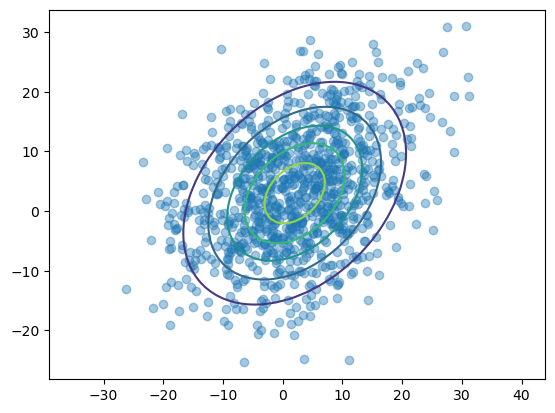

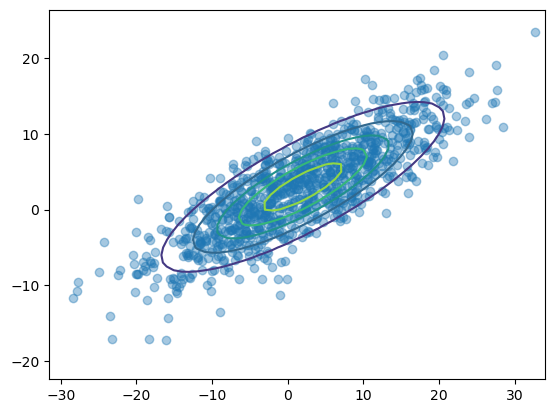

ValueError: The input matrix must be symmetric positive semidefinite.

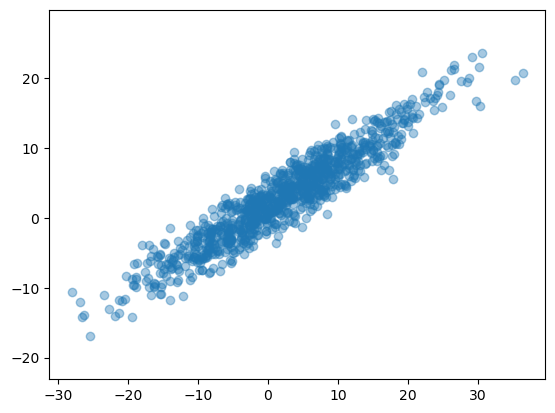

In [11]:
cov1 = np.array([[10**2, 6**2], [6**2, 10**2]])
cov2 = np.array([[10**2, 7**2], [7**2, 6**2]])
cov3 = np.array([[10**2, 8**2], [8**2, 6**2]])
sample1 = np.random.multivariate_normal(means, cov1, size=1000)
sample2 = np.random.multivariate_normal(means, cov2, size=1000)
sample3 = np.random.multivariate_normal(means, cov3, size=1000)

plt.scatter(sample1[:, 0], sample1[:, 1], alpha = 0.4)
plt.axis('equal')
x, y = np.mgrid[-25:35,-20:25]
pos = np.dstack((x, y))
rv = multivariate_normal(means, cov1)
plt.contour(x, y, rv.pdf(pos), levels=5)

plt.show()

plt.scatter(sample2[:, 0], sample2[:, 1], alpha = 0.4)
plt.axis('equal')
x, y = np.mgrid[-25:35,-20:25]
pos = np.dstack((x, y))
rv = multivariate_normal(means, cov2)
plt.contour(x, y, rv.pdf(pos), levels=5)

plt.show()

plt.scatter(sample3[:, 0], sample3[:, 1], alpha = 0.4)
plt.axis('equal')
x, y = np.mgrid[-25:35,-20:25]
pos = np.dstack((x, y))
rv = multivariate_normal(means, cov3)
plt.contour(x, y, rv.pdf(pos), levels=5)

plt.show()

#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [12]:
mu_r = means-means
cov_r = cov1 + cov2

print("Populacijska srednja vrijednost za Xr:", mu_r)
print("Populacijska kovarijacijska matrica za Xr:\n", cov_r)


Populacijska srednja vrijednost za Xr: [0 0]
Populacijska kovarijacijska matrica za Xr:
 [[200  85]
 [ 85 136]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [13]:
x1 = np.random.multivariate_normal(means, cov1, size=10**7)
x2 = np.random.multivariate_normal(means, cov2, size=10**7)

mean1 = np.mean(x1, axis=0)
mean2 = np.mean(x2, axis=0)

covx1 = np.cov(x1, rowvar=False)
covx2 = np.cov(x2, rowvar=False)

meanr = mean1 - mean2
covr = covx1 + covx2

print("Procjena populacijske srednje vrijednosti za Xr:", meanr)
print("Procjena populacijske kovarijacijske matrice za Xr:\n", covr)


Procjena populacijske srednje vrijednosti za Xr: [0.00404499 0.00678313]
Procjena populacijske kovarijacijske matrice za Xr:
 [[199.94745268  84.99955464]
 [ 84.99955464 136.08804296]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [14]:
K = 10**5
n = 100
x1_samples = np.random.multivariate_normal(means, cov1, size=(K, n))
x2_samples = np.random.multivariate_normal(means, cov2, size=(K, n))

x1_mean = np.mean(x1_samples, axis=1)
x2_mean = np.mean(x2_samples, axis=1)
x1_cov = np.array([np.cov(x1_samples[i], rowvar=False) for i in range(K)])
x2_cov = np.array([np.cov(x2_samples[i], rowvar=False) for i in range(K)])

xr_mean = x1_mean - x2_mean
xr_cov = (1/n) * (x1_cov + x2_cov)

print("Procjena srednje vrijednosti za Xr[0]:", np.mean(xr_mean))
print("Procjena kovarijacijske matrice za Xr[0]:", xr_cov[0])


Procjena srednje vrijednosti za Xr[0]: -0.002667775518121929
Procjena kovarijacijske matrice za Xr[0]: [[1.97841736 0.82990555]
 [0.82990555 1.19934994]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [15]:
mean_3 = np.array([2, 3])
cov_3 = np.array([[10**2, 7**2], [7**2, 6**2]])

sample_3 = np.random.multivariate_normal(mean_3, cov_3, size=1000)

print(sample_3[:5])

[[  8.14644849   2.74728755]
 [-13.20469346  -4.43773703]
 [ -2.8666483    1.94713621]
 [  2.1466961    2.56805021]
 [ -3.4479394    4.81467787]]


#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

In [16]:
def hotelling(sample, mean, cov):
    centered = np.mean(sample, axis = 0) - mean
    inverse = np.linalg.inv(cov* (1.0/ len(sample)))
    t_squared = np.dot(np.dot(centered.T, inverse), centered)
    return t_squared

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [18]:
from scipy import stats

t_squared = hotelling(sample_3, mean_3, cov_3)
alpha = 0.05
n = len(sample_3)
p = len(mean_3)
critical_value = ((n - 1) * p) / (n - p) * ((n-1) / (n-1 - p)) * stats.f.ppf(1 - alpha, p, n-1)
print(f"T_squared: {t_squared}, Kriticna vrijednost: {critical_value}")
if t_squared > critical_value:
    print("Odbacujemo nultu hipotezu H0.")
else:
    print("Ne odbacujemo nultu hipotezu H0.")
    

T_squared: 4.140518482726798, Kriticna vrijednost: 6.027555999416057
Ne odbacujemo nultu hipotezu H0.


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

In [19]:
alpha = 0.05
df1 = 2
df2 = len(sample_3)
critical_value = stats.f.ppf(1 - alpha / 2, df1, df2)

t_squared = hotelling(sample_3, mean_3, cov_3)
lower_bound = mean_3 - np.sqrt(t_squared * (df1 * (df2 - 1)) / (df2 * (df2 - df1)) * critical_value)
upper_bound = mean_3 + np.sqrt(t_squared * (df1 * (df2 - 1)) / (df2 * (df2 - df1)) * critical_value)

print("95%-tni interval pouzdanosti za srednje vrijednosti varijabli mu1 i mu2:")
print("Donja granica:", lower_bound)
print("Gornja granica:", upper_bound)
print()

diff_mean = mean_3[1] - mean_3[0]
diff_t = diff_mean ** 2 / t_squared
diff_lower = diff_mean - np.sqrt(diff_t * (df1 * (df2 - 1)) / (df2 * (df2 - df1)) * critical_value)
diff_upper = diff_mean + np.sqrt(diff_t * (df1 * (df2 - 1)) / (df2 * (df2 - df1)) * critical_value)

print("95%-tni interval pouzdanosti za razliku mu2 - mu1:")
print("Donja granica:", diff_lower)
print("Gornja granica:", diff_upper)


95%-tni interval pouzdanosti za srednje vrijednosti varijabli mu1 i mu2:
Donja granica: [1.82481029 2.82481029]
Gornja granica: [2.17518971 3.17518971]

95%-tni interval pouzdanosti za razliku mu2 - mu1:
Donja granica: 0.9576889442796795
Gornja granica: 1.0423110557203206


Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

In [20]:
sample_std = np.std(sample_3, axis=0, ddof=1)

alpha = 0.05
n = len(sample_3)
t_critical = stats.t.ppf(1 - alpha / 2, n-1)
error = t_critical * sample_std / np.sqrt(n)
lower_bound = np.round(mean_3 - error, 5)
upper_bound = np.round(mean_3 + error, 5)

alpha_bonf = alpha / len(mean_3)
t_bonf = stats.t.ppf(1 - alpha_bonf / 2, n-1)
bonferroni = t_bonf * sample_std / np.sqrt(n)
lower_bonf = np.round(mean_3 - bonferroni, 5)
upper_bonf = np.round(mean_3 + bonferroni, 5)

print("95%-tni univarijatni t-interval pouzdanosti:")
print(f"Var 1 - Donja granica: {lower_bound[0]} Gornja granica: {upper_bound[0]}")
print(f"Var 2 - Donja granica: {lower_bound[1]} Gornja granica: {upper_bound[1]}")
print("\nBonferronijeva korekcija t-intervala:")
print(f"Var 1 - Donja granica: {lower_bonf[0]} Gornja granica: {upper_bonf[0]}")
print(f"Var 2 - Donja granica: {lower_bonf[1]} Gornja granica: {upper_bonf[1]}")


95%-tni univarijatni t-interval pouzdanosti:
Var 1 - Donja granica: 1.38039 Gornja granica: 2.61961
Var 2 - Donja granica: 2.62272 Gornja granica: 3.37728

Bonferronijeva korekcija t-intervala:
Var 1 - Donja granica: 1.29121 Gornja granica: 2.70879
Var 2 - Donja granica: 2.56842 Gornja granica: 3.43158


Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

In [21]:
alpha = 0.05
n = len(sample_3)
sample_std = np.std(sample_3, axis=0, ddof=1)

lower_critical = stats.chi2.ppf(alpha / 2, n-1)
upper_critical = stats.chi2.ppf(1 - alpha / 2, n-1)
chi2_lower = (n - 1) * sample_std ** 2 / upper_critical
chi2_upper = (n - 1) * sample_std ** 2 / lower_critical

print("95%-tni chi-squared interval pouzdanosti za srednju vrijednost svake varijable:")
print("Varijabla 1 - Donja granica:", chi2_lower[0], ", Gornja granica:", chi2_upper[0])
print("Varijabla 2 - Donja granica:", chi2_lower[1], ", Gornja granica:", chi2_upper[1])


95%-tni chi-squared interval pouzdanosti za srednju vrijednost svake varijable:
Varijabla 1 - Donja granica: 91.50084639345677 , Gornja granica: 109.05220531939992
Varijabla 2 - Donja granica: 33.92519625872762 , Gornja granica: 40.43260378160023


U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [22]:
from sklearn.datasets import load_iris

load = load_iris()

Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [23]:
data = load.data
mu = np.mean(data, axis=0)
sigma = np.cov(data, rowvar=False)
target = load.target

print(mu)
print(sigma)

[5.84333333 3.05733333 3.758      1.19933333]
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

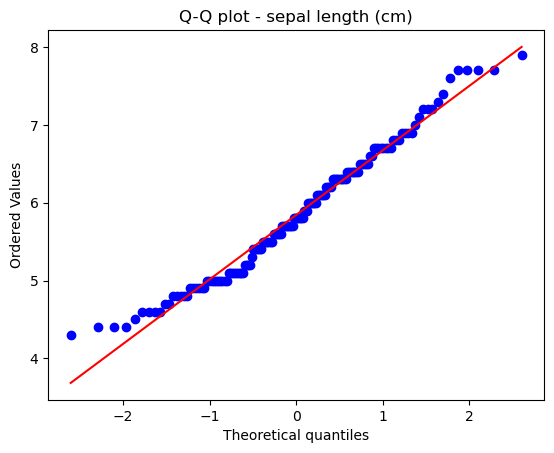

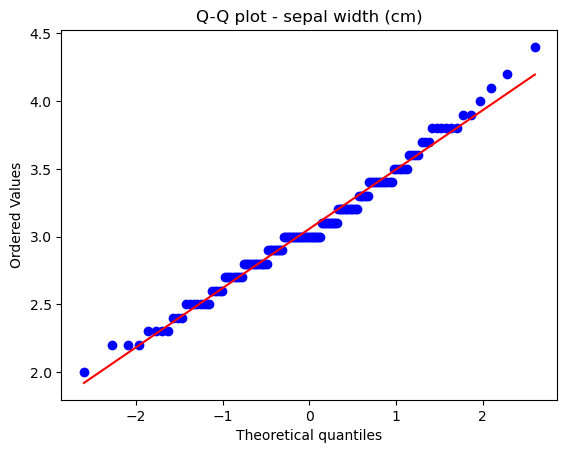

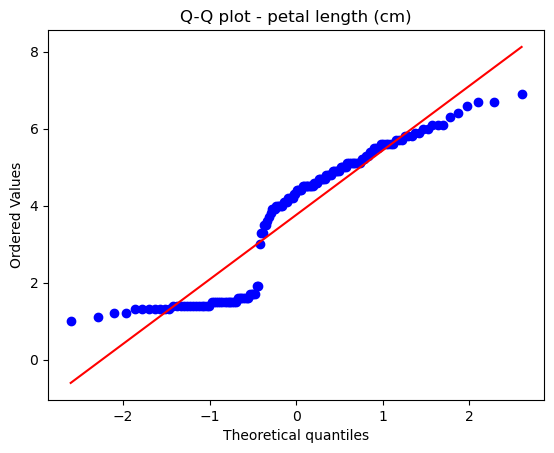

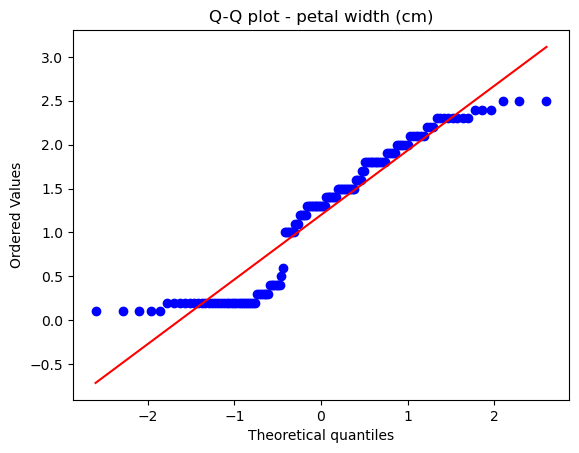

In [24]:
for i in range(4):
    stats.probplot(data[:,i], dist="norm", plot=plt)
    plt.title(f"Q-Q plot - {load.feature_names[i]}")
    plt.show()

Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

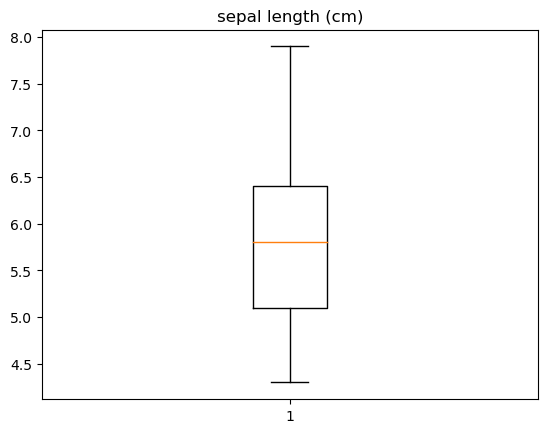

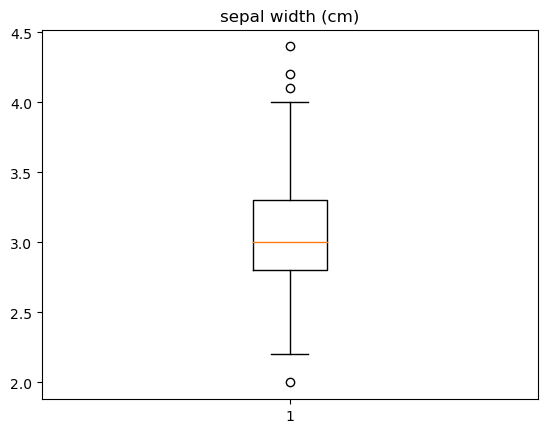

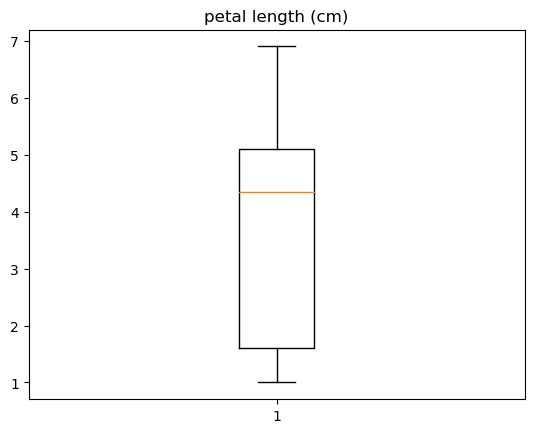

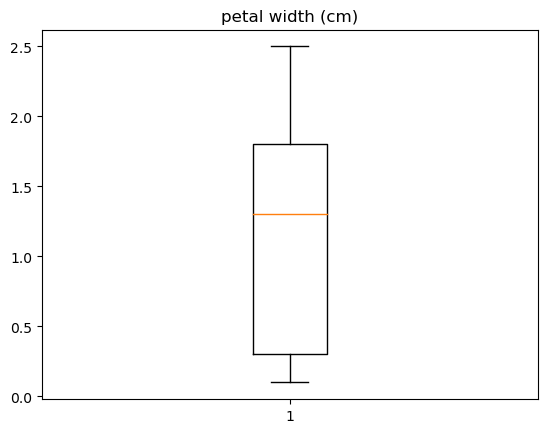

In [25]:
for i in range(4):
    plt.boxplot(data[:,i])
    plt.title(f"{load.feature_names[i]}")
    plt.show()

Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [26]:
t_squared = hotelling(data, mu, sigma)
alpha = 0.05
n = len(data)
p = len(mu)
critical_value = ((n - 1) * p) / (n - p) * ((n-1) / (n-1 - p)) * stats.f.ppf(1 - alpha, p, n-1)

print(f"Hotelling T-kvadrat: {t_squared}, kritična vrijednost: {critical_value}")
if t_squared > critical_value:
    print("Odbacujemo nultu hipotezu H0.")
else:
    print("Ne odbacujemo nultu hipotezu H0.")

Hotelling T-kvadrat: 0.0, kritična vrijednost: 10.203330589660963
Ne odbacujemo nultu hipotezu H0.


Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [27]:
#print(load.feature_names)
#print(load.target_names)

a = np.array(data[:,0] - data[:,2])
b = np.array(data[:,1] - data[:,3])
c = np.column_stack((a, b))
iris_mean = np.mean(c, axis = 0)
iris_cov = np.cov(c, rowvar=False)

n, p = c.shape
value = n*np.dot(np.dot(iris_mean, np.linalg.inv(iris_cov)), iris_mean.T)
alpha = 0.05
df1 = p
df2 = n - p
critical_value = (n-1)*p/(n-p)*stats.f.ppf(1-alpha, df1, df2)
t_squared = hotelling(c, iris_mean, iris_cov)

#print(f"Hotelling T-kvadrat: {t_squared}, kritična vrijednost: {critical_value}")
if t_squared > critical_value:
    print("Odbacujemo nultu hipotezu H0.")
else:
    print("Ne odbacujemo nultu hipotezu H0.")

Ne odbacujemo nultu hipotezu H0.


**Bonus**: Postoji li dodatno istraživačko pitanje koje želite testirati?

In [ ]:
# <Vaš kôd ovdje>
print("Ne.")